# **Loan Approvals**



*   `Gender` : Gender of Person
*   `Married` : Marital Status
*   `Dependents` : Number of dependents
*   `Education` : Education Level
*   `Self_Employed` : If they are self employed.
*   `Applicant_Income` : Income of applicant
*   `Coapplicant_Income` : Income of co applicant.
*   `Loan_Amount` : Loan Amount
*   `Term` : Term of loan
*   `Credit_History` : If they have good/bad credit history.
*   `Area` : Geographical Area
*   `Status` : Loan approval status

[Loan Approvals Dataset](https://www.kaggle.com/datasets/prateekmaj21/loan-approvals)

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


## **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [5]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [6]:
!pip install summarytools
from summarytools import dfSummary
dfSummary(df)

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Gender[object],1. Male2. Female3. nan,489 (79.6%)112 (18.2%)13 (2.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3dQWrbYBSF0adgQjORMAYvRovoYrsI7cYYa1CHTNRB09J0rvsMPmeWkX7IZwsF33jYtq0g4aX7ADyPoarequq1+yBEfGzbdu+6+OF0On0fx/HYdQBy1nW9DsPwoyu4wziOx3me79M0vXccgIzb7fZtWZbj5XJ5raqe2Kqqpml6P5/PPzsOQNRb58U9IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5lD1+7NO3QdhX4/wOz6s63pdluVYzZ91Yn/rul6r6qPr+jYIz6V1gzCY8pHS8c7W+uqiT3xd1b3woU90XfUICx/6dKyrPPU+KX/UJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZMdF31CAsf+sTXVd0LH/rYIBBjXUWMBwRi/r+NusWxmy9TPjM79vTyZ8o3z/P9Mzr/ioFd/J3yff5sZsduPCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI8YXpRHz75TPzI5d2SAQY8pHzC9vKZbrtGqnCwAAAABJRU5ErkJggg=="">",13(2.1%)
2,Married[object],1. Yes2. No3. nan,398 (64.8%)213 (34.7%)3 (0.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bwW2DQBhE4cFCVnJZhJAohiJcbIqgG4TYg235Qg446YBZ+P2+CtbyEwaLqdZ1FeBwKX0AfI5K0reka+mD4N9rXddH6UPsoe667pZSaksfBJuc81xV1U/E4OqUUjsMw6Npmmfpw3y6ZVm+xnFsp2m6SooXmyQ1TfPs+/5e+jCQtN3WhMQDAmyIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthgU0vbe1SlD4L430Odc57HcWwV+D2qM8k5z5Jepc+xBzYIxxN2g1Ax5YNL5Ctb2CvEWYVdV0VeKZ1VyHVV9JXSWUVeV/F0fTD8qQsbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22IRcV0X7PFGEXVdFXimdFRsE2LCugg0PCLD5+xkVPznYW9113U2SmL1hb5eUUvvejUZ8SMCBcM8GG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTb1e/ImMXvDztggwIYpH2x+ARDSg2zURiOQAAAAAElFTkSuQmCC"">",3(0.5%)
3,Dependents[object],1. 02. 13. 24. 3+5. nan,345 (56.2%)102 (16.6%)101 (16.4%)51 (8.3%)15 (2.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACPUlEQVR4nO3bwWnjUBiF0V+DCMlGwhhcjIuYYqcIdWOMtZiEbJRFCExwNhajKyOfU8HDfEjIvNtM01SQ8GvtA/A4xEaM2Ihpquqlqp7WPshGvU/T9Lr2Ie5Fu9/vf3ddt1v7IFs0juO5aZo/gvvUdl23Ox6Pr33fv619mC25XC7PwzDsTqfTU1WJraraqqq+798Oh8PftQ+zQS9rH+Ce+EAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLaqs/rMGsfZGv8ptfacRzPwzDsynWY/24cx3NVva99jnvhWviyXAv/R2M3SooPBGKSr1GvlAcXW1dZGhFZV1kaUZVdV/lr5cH5QCBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YiLrKksjqoLrKksjXAsnxrqKGB8IxKReo16hZNZVllVUBdZVllV8Sa2rLKvwgUCO2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxCy+rrKs4ktkXWVZRZVr4QRZVxEz98nmScXNZg1eDFiY4+bBiwELc80dvBiwcDN/6hIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5uZ1lbUUc81aV1lLMYcNAjHWVcT89GTz1GIRV+sqyymW8m1dZTnFkn5aV1lOsQh/6hIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5tu6ynKKJV2tqyynWIoNAjHWVcT4QCBGbMR8AMcxDjdj3az3AAAAAElFTkSuQmCC"">",15(2.4%)
4,Education[object],1. Graduate2. Not Graduate,480 (78.2%)134 (21.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0adiQjORMAYvJovoYrsI7cYYa9CETNxBt1A9fZJ7NpAPuQkk+KXzPAU4JElXSZfRh6Cr53me99FHTMuyfOWc59GHoJ/W2p5S+h4d3JRznm+3272U8hh5CPo4juOz1jpv23aRNDY2SSqlPNZ1/Rl5CLq6jj5Akj5GH4D3QWywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtig80k/T1gN/oQ9BHpvZ1aa3utdVaQB+zw/1pru6Tn6DsYvLyHEIOXxJQPLpG+2UJ8+tBPmClflLkZ+gkx5Ys0N0M/kaZ8/Bp+cfypCxtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsQkz5Rr8+PMJM+aLMzdAPgxfY/AIKW2rfo82IgwAAAABJRU5ErkJggg=="">",0(0.0%)
5,Self_Employed[object],1. No2. Yes3. nan,500 (81.4%)82 (13.4%)32 (5.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkUlEQVR4nO3bTUrDUBiF4S9SRCcJpdDFdBEu1kVkN6X0DlScxIFD8WeQnhvweTZwA33bkJIzLMtSkHDX+wL4P4aqeqyq

### **Data Cleansing**

In [7]:
# Checking missing value
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Term,14
Credit_History,50


**fill the nan value in the `Gender` column with the mode value**

In [8]:
df.Gender.value_counts()

,count
Gender,
Male,489
Female,112


In [9]:
#Tracking missing value in Gender
df[df['Gender'].isna()==1]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,67400,529600.0,16800000,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,247300,184300.0,15900000,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,983300,183300.0,18200000,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,208300,408300.0,16000000,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,1669200,0.0,11000000,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,287300,187200.0,13200000,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,358300,0.0,9600000,360.0,1.0,Urban,N


In [10]:
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender,inplace=True)

In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,502
Female,112


**fill the nan value in the `Self_Employee` column with the mode value**

In [12]:
df.Self_Employed.value_counts()

,count
Self_Employed,
No,500
Yes,82


In [13]:
df[df['Self_Employed'].isna()==1]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
11,Male,Yes,2,Graduate,NaN,250000,184000.0,10900000,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,260000,350000.0,11500000,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,371700,292500.0,15100000,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,375000,208300.0,12000000,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,416600,336900.0,20100000,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,678200,0.0,0,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,733300,0.0,12000000,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,292900,233300.0,13900000,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,505000,0.0,11800000,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,298000,208300.0,12000000,360.0,1.0,Rural,Y


In [14]:
Self_employed_value = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(Self_employed_value, inplace=True)

In [15]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,532
Yes,82


**fill the nan value in the `Dependents` column with the mode value and change `3+` to `3` and astype to Int**

In [16]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [17]:
df[df['Dependents'].isna()==1]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,566700,266700.0,18000000,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,473500,0.0,13800000,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,541700,0.0,14300000,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,287500,175000.0,10500000,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,283300,0.0,7100000,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,550300,449000.0,7000000,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,352300,323000.0,15200000,360.0,0.0,Rural,N


In [18]:
mode_dependents = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode_dependents, inplace=True)

In [19]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

In [20]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3,51


fill the nan value in the Credit_history_mode column with the mode value

In [21]:
credit_history_mode = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(credit_history_mode, inplace=True)

In [22]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,525
0.0,89


In [23]:
df['Credit_History'] = df['Credit_History'].replace(1.0, 'Yes')
df['Credit_History'] = df['Credit_History'].replace(0.0, 'No')
df['Credit_History'].value_counts()

,count
Credit_History,
Yes,525
No,89


fill the nan value in the `Married` column with the mode value

In [24]:
df[df['Married'].isna()==1]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
104,Male,NaN,0,Graduate,No,381600,75400.0,16000000,360.0,Yes,Urban,Y
228,Male,NaN,0,Graduate,No,475800,0.0,15800000,480.0,Yes,Semiurban,Y
435,Female,NaN,0,Graduate,No,1004700,0.0,0,240.0,Yes,Semiurban,Y


In [25]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [26]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Term,14
Credit_History,0


fill the nan value in the `Term` column with the mode value

In [27]:
df['Term'].value_counts()

,count
Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [28]:
df[df['Term'].isna()==1]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
19,Male,Yes,0,Graduate,No,260000,350000.0,11500000,NaN,Yes,Urban,Y
36,Male,Yes,0,Graduate,No,182800,133000.0,10000000,NaN,No,Urban,N
44,Male,Yes,0,Not Graduate,Yes,469500,0.0,9600000,NaN,Yes,Urban,Y
45,Female,No,0,Graduate,No,341000,0.0,8800000,NaN,Yes,Urban,Y
73,Male,Yes,3,Not Graduate,No,475500,0.0,9500000,NaN,No,Semiurban,N
112,Male,Yes,0,Not Graduate,No,357200,411400.0,15200000,NaN,No,Rural,N
165,Male,Yes,0,Graduate,No,370700,316600.0,18200000,NaN,Yes,Rural,Y
197,Female,No,0,Not Graduate,No,190700,236500.0,12000000,NaN,Yes,Urban,Y
223,Male,Yes,0,Graduate,No,757800,101000.0,17500000,NaN,Yes,Semiurban,Y
232,Male,No,0,Not Graduate,No,318900,259800.0,12000000,NaN,Yes,Rural,Y


In [29]:
df['Term'].fillna(df['Term'].median(), inplace=True)

In [30]:
df['Term'].value_counts()

,count
Term,
360.0,526
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [34]:
df['Term'] = df['Term'].astype(int)

In [35]:
df['Term'] = df['Term'].astype(object)

In [36]:
#Handling missing data completed
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Term,0
Credit_History,0


In [37]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data

,Gender,Married,Education,Self_Employed,Term,Credit_History,Area,Status
0,Male,No,Graduate,No,360,Yes,Urban,Y
1,Male,Yes,Graduate,No,360,Yes,Rural,N
2,Male,Yes,Graduate,Yes,360,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,360,Yes,Urban,Y
4,Male,No,Graduate,No,360,Yes,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,360,Yes,Rural,Y
610,Male,Yes,Graduate,No,180,Yes,Rural,Y
611,Male,Yes,Graduate,No,360,Yes,Urban,Y
612,Male,Yes,Graduate,No,360,Yes,Urban,Y


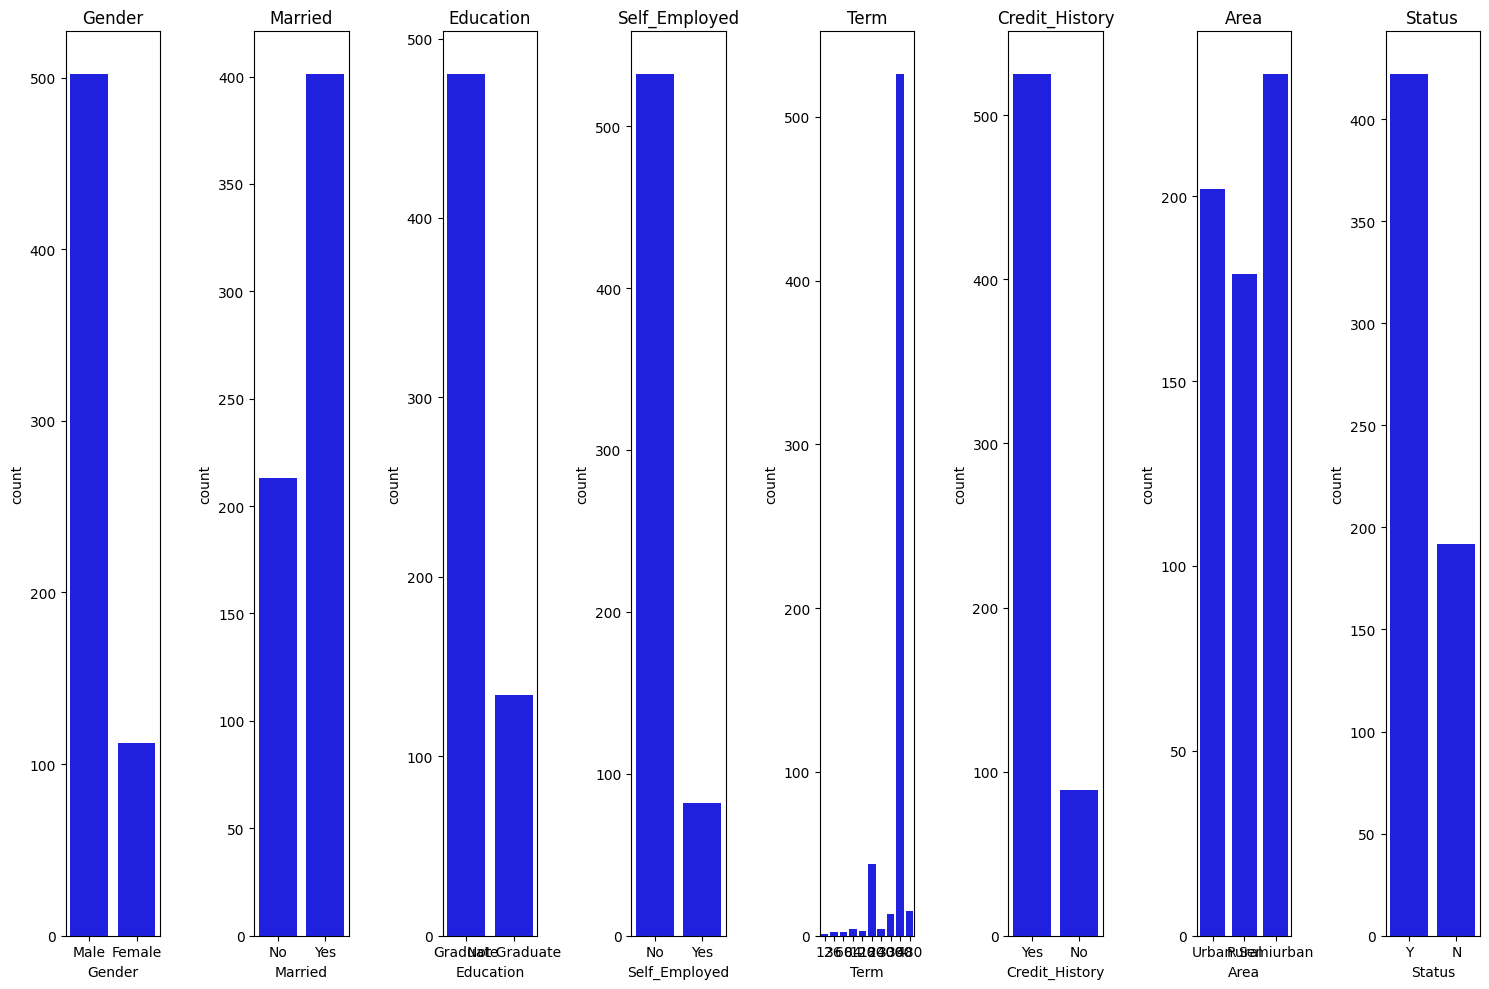

In [38]:
plt.figure(figsize=(15,10))
num_cols = len(categorical_data.columns)
for i, col in enumerate(categorical_data.columns):
    plt.subplot(1, num_cols, i + 1)
    sns.countplot(x=df[col], color='blue')
    plt.title(col)
    plt.tight_layout()

In [39]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
numerical_data.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount
0,0,584900,0.0,15000000
1,1,458300,150800.0,12800000
2,0,300000,0.0,6600000
3,0,258300,235800.0,12000000
4,0,600000,0.0,14100000


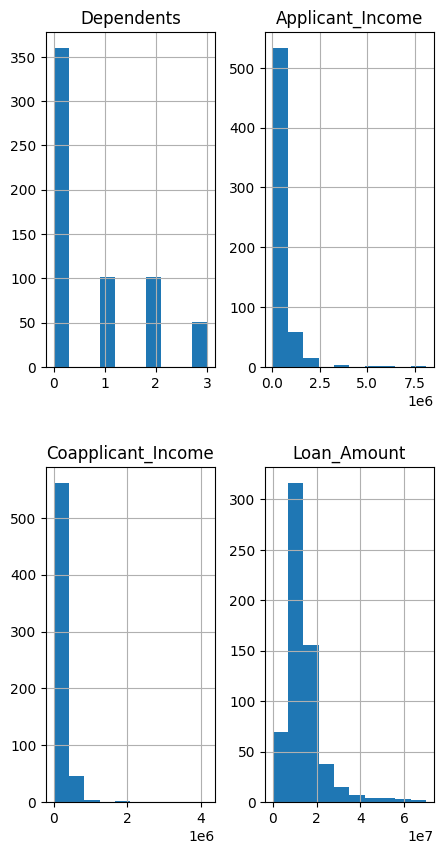

In [40]:
#bins of data
df.hist(figsize=(5,10))
plt.show()

<Axes: >

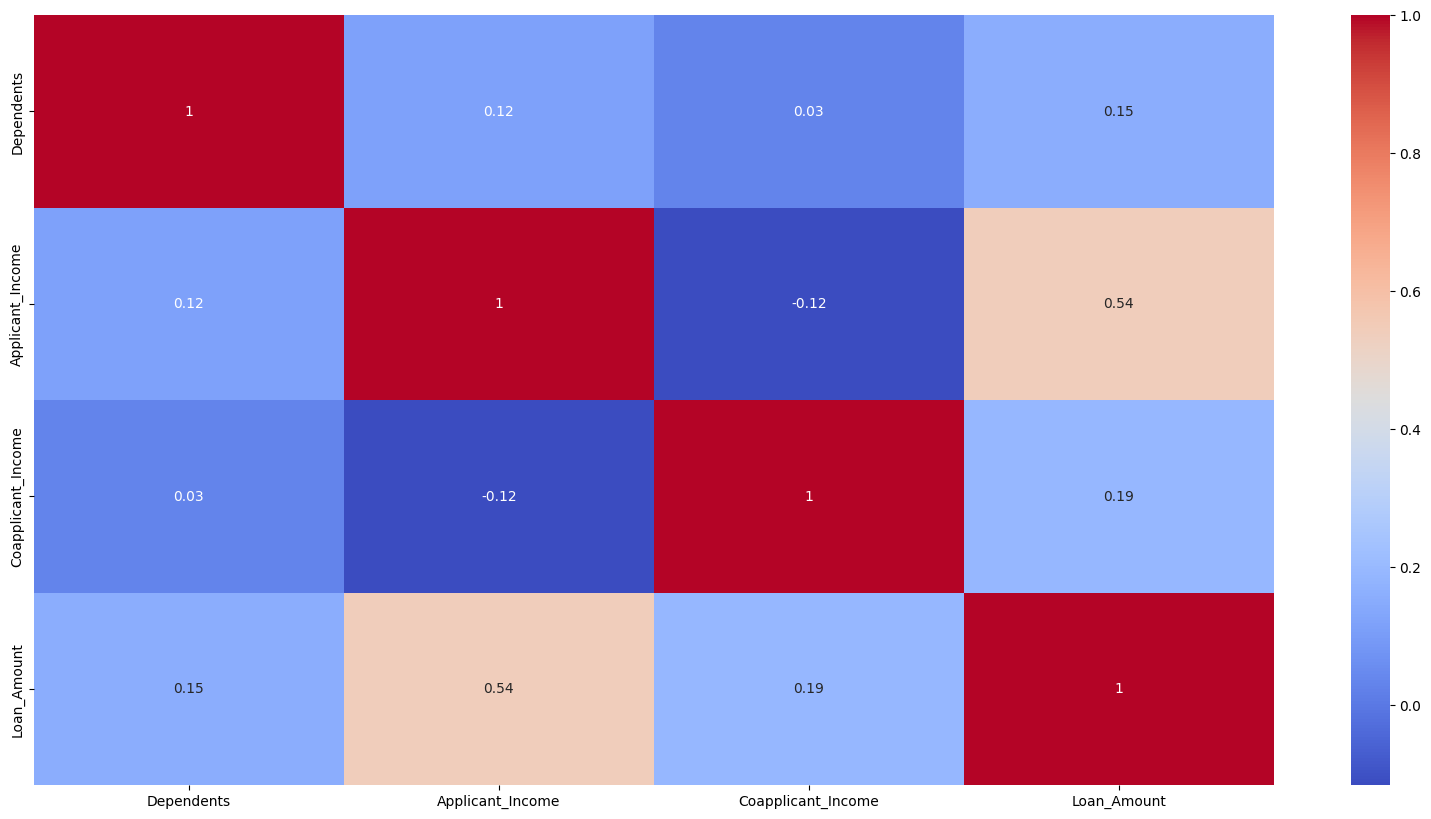

In [41]:
#numerical data
plt.figure(figsize=(20,10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

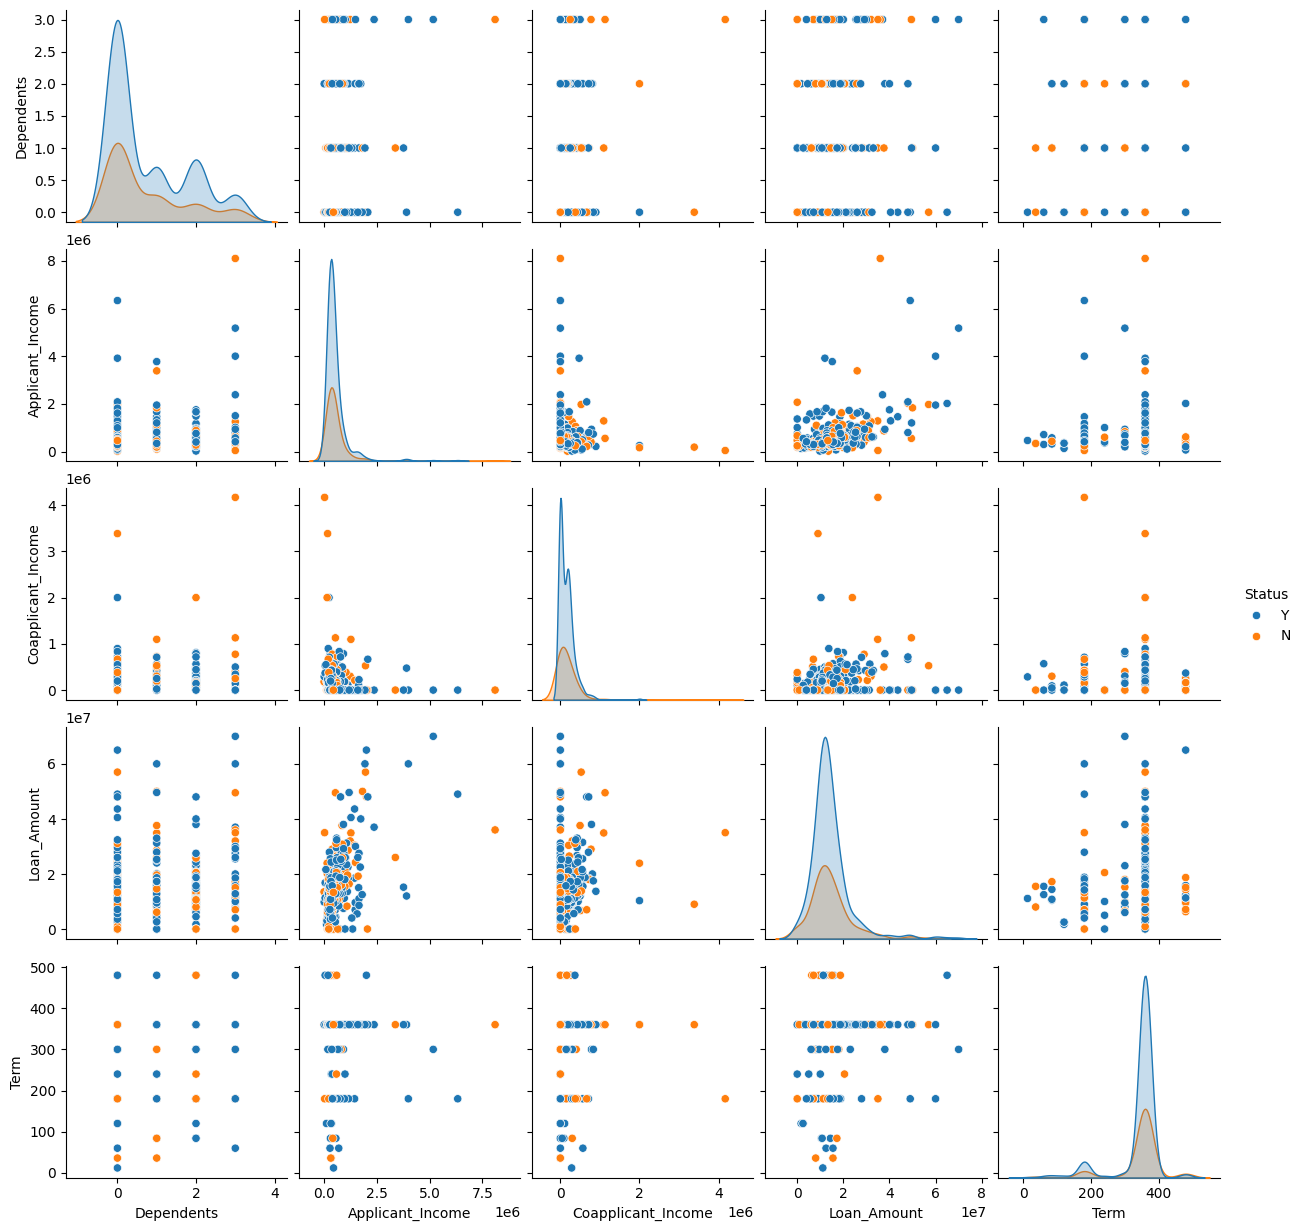

In [42]:
sns.pairplot(data=df, hue='Status')

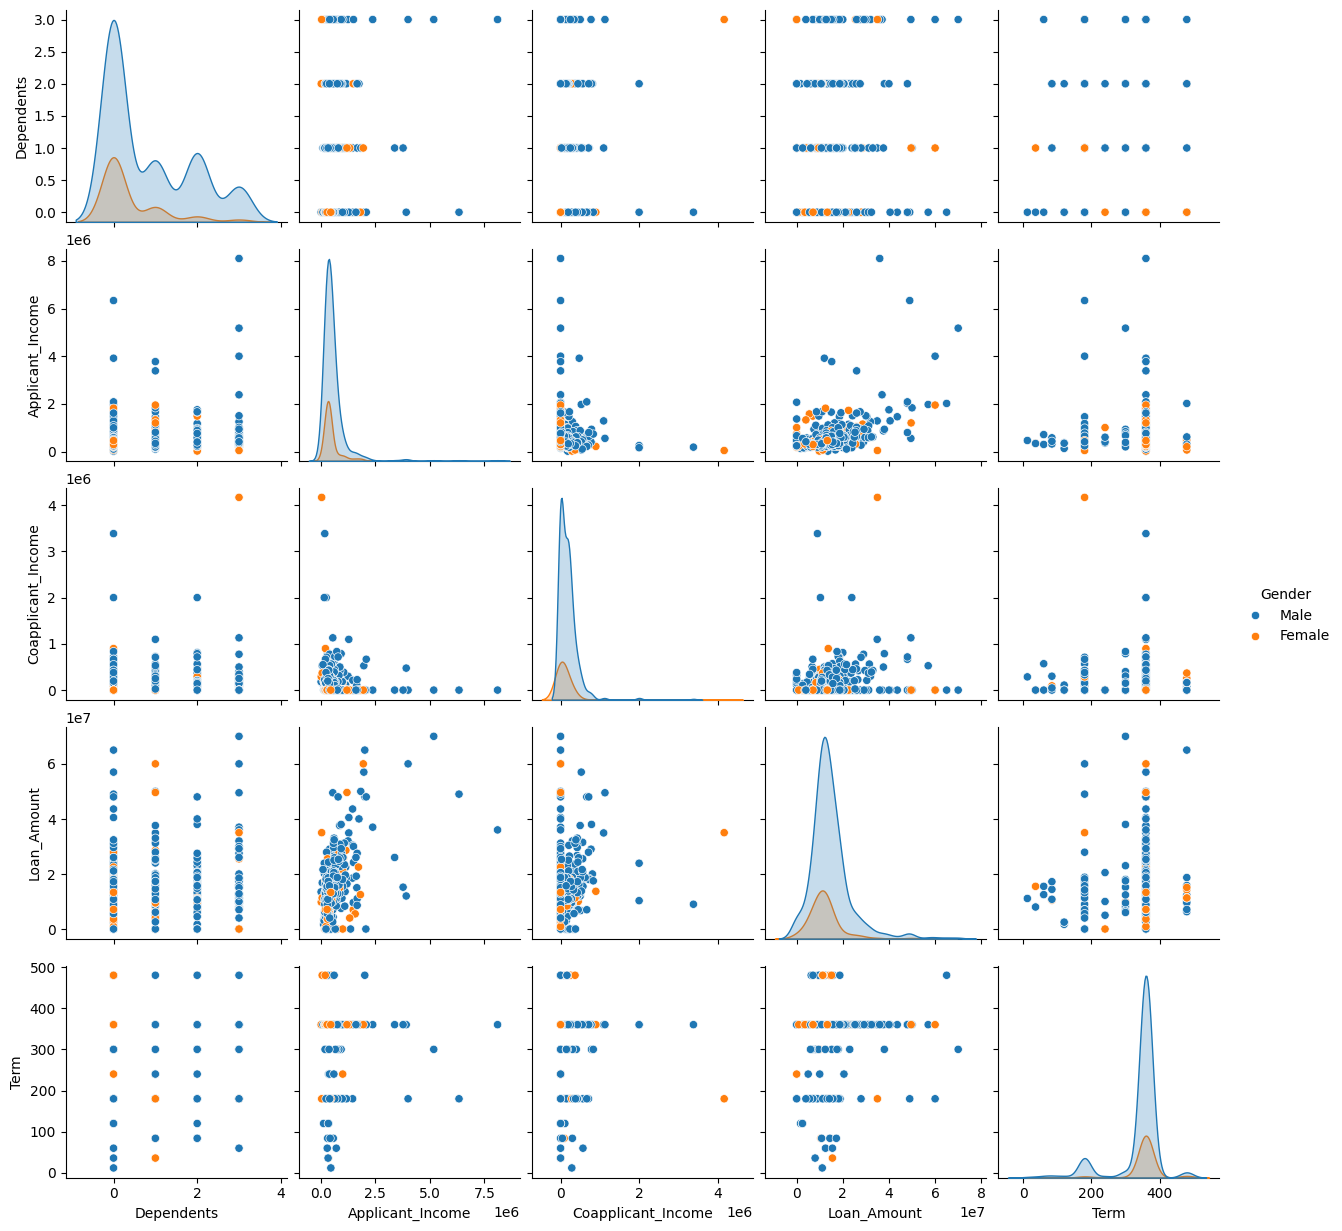

In [43]:
sns.pairplot(data=df, hue='Gender')

Bivariate Analysis

In [44]:
df.groupby('Status')['Applicant_Income'].describe().T

Status,N,Y
count,1.920000e+02,4.220000e+02
mean,5.446078e+05,5.384069e+05
std,6.819559e+05,5.765442e+05
min,1.500000e+04,2.100000e+04
25%,2.885000e+05,2.877500e+05
50%,3.833500e+05,3.812500e+05
75%,5.861250e+05,5.771500e+05
max,8.100000e+06,6.333700e+06


In [45]:
df.groupby('Gender')[['Applicant_Income']].describe().T

Gender                        Female          Male
Applicant_Income count  1.120000e+02  5.020000e+02
                 mean   4.643473e+05  5.573018e+05
                 std    3.585381e+05  6.531266e+05
                 min    2.100000e+04  1.500000e+04
                 25%    2.661500e+05  2.900500e+05
                 50%    3.583000e+05  3.862000e+05
                 75%    4.606500e+05  5.939500e+05
                 max    1.948400e+06  8.100000e+06

In [46]:
df.groupby('Married')[['Applicant_Income','Loan_Amount']].describe().T

Married                           No           Yes
Applicant_Income count  2.130000e+02  4.010000e+02
                 mean   4.970385e+05  5.633496e+05
                 std    4.004333e+05  6.967223e+05
                 min    4.160000e+04  1.500000e+04
                 25%    2.917000e+05  2.873000e+05
                 50%    3.750000e+05  3.859000e+05
                 75%    5.417000e+05  5.821000e+05
                 max    3.771900e+06  8.100000e+06
Loan_Amount      count  2.130000e+02  4.010000e+02
                 mean   1.253521e+07  1.499401e+07
                 std    7.622511e+06  9.284569e+06
                 min    0.000000e+00  0.000000e+00
                 25%    8.300000e+06  1.040000e+07
                 50%    1.150000e+07  1.300000e+07
                 75%    1.440000e+07  1.750000e+07
                 max    6.500000e+07  7.000000e+07

In [47]:
df.groupby(['Status','Gender'])['Loan_Amount'].mean()

Status  Gender
N       Female    1.252162e+07
        Male      1.466968e+07
Y       Female    1.223600e+07
        Male      1.448934e+07
Name: Loan_Amount, dtype: float64

In [48]:
df.to_csv('loan_approval_cleandata.csv', index=False)

### **Data Preparation**
Preprocessing Data

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
categorical_data.head()

,Gender,Married,Education,Self_Employed,Term,Credit_History,Area,Status
0,Male,No,Graduate,No,360,Yes,Urban,Y
1,Male,Yes,Graduate,No,360,Yes,Rural,N
2,Male,Yes,Graduate,Yes,360,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,360,Yes,Urban,Y
4,Male,No,Graduate,No,360,Yes,Urban,Y


In [51]:
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [52]:
scaler = StandardScaler
df[numerical_data.columns] = scaler().fit_transform(df[numerical_data.columns])

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,-0.737806,0,0,0.072991,-0.554487,0.097515,8,1,2,1
1,1,1,0.253470,0,0,-0.134412,-0.038732,-0.152244,8,1,0,0
2,1,1,-0.737806,0,1,-0.393747,-0.554487,-0.856110,8,1,2,1
3,1,1,-0.737806,1,0,-0.462062,0.251980,-0.243065,8,1,2,1
4,1,0,-0.737806,0,0,0.097728,-0.554487,-0.004659,8,1,2,1


In [54]:
x = df.drop('Status', axis=1)
y = df['Status']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

#### **Build Model**
create model from 3 model algorithm and find the best model for this case.

In [56]:
!pip install xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [57]:
def models(x_train,y_train):

  loreg=LogisticRegression()
  loreg.fit(x_train,y_train)

  Xgb=XGBClassifier()
  Xgb.fit(x_train,y_train)

  svc=SVC()
  svc.fit(x_train,y_train)

  print('[0] Logistic Regression Training Accuracy:', loreg.score(x_train, y_train))
  print('[1] XGBoost Classifier Training Accuracy:', Xgb.score(x_train, y_train))
  print('[2] Support Vector Machine Training Accuracy:', svc.score(x_train, y_train))

  return loreg, Xgb, svc

### **Evaluation**

Showing score from trained model

In [58]:
model = models(x_train,y_train)

[0] Logistic Regression Training Accuracy: 0.8044806517311609
[1] XGBoost Classifier Training Accuracy: 1.0
[2] Support Vector Machine Training Accuracy: 0.8065173116089613


testing and showing the conf metrics

In [59]:
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(x_test))
  TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
  print(cm)
  print('Model[{}] Testing Accuracy = "{} "'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()

[[23 17]
 [ 2 81]]
Model[0] Testing Accuracy = "0.8455284552845529 "

[[24 16]
 [ 8 75]]
Model[1] Testing Accuracy = "0.8048780487804879 "

[[23 17]
 [ 2 81]]
Model[2] Testing Accuracy = "0.8455284552845529 "



from the testing accuracy we can conclude that XGBoost is the best model among the other 2 models

In [60]:
xgboost = XGBClassifier()
fix_model = xgboost.fit(x_train, y_train)
fix_model.score(x_train, y_train)

1.0

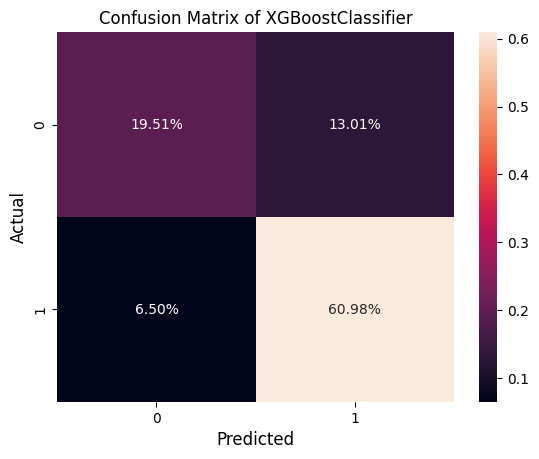

In [61]:
pred = fix_model.predict(x_test)
cf_matrix = confusion_matrix(y_test, pred)
#fmt='.2%'
# Visualize Confution Matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True)
plt.title('Confusion Matrix of XGBoostClassifier', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [72]:
pred = fix_model.predict(x_test)
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix

array([[24, 16],
       [ 8, 75]])

In [62]:
!pip install shap
import shap

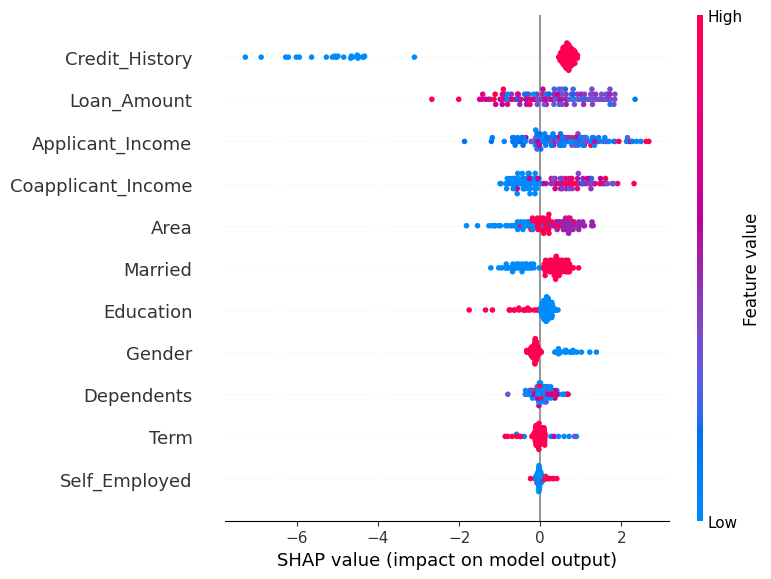

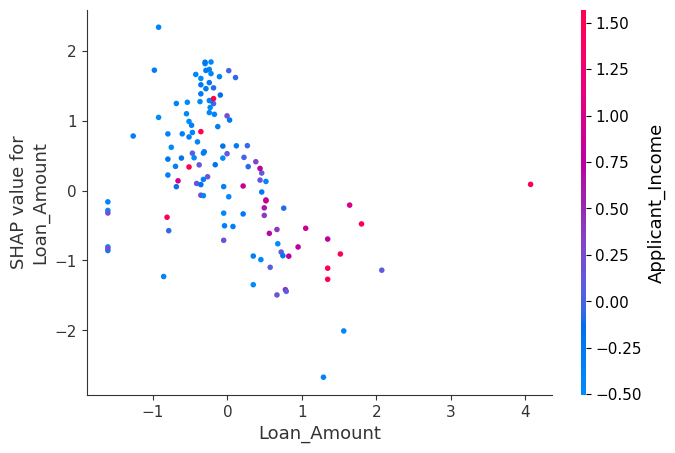

In [68]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(fix_model)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(x_test)

# Summary plot for global feature importance
shap.summary_plot(shap_values, x_test)

# Dependence plot for a specific feature
shap.dependence_plot('Loan_Amount', shap_values, x_test)

# Force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

Saving model to pickle

In [69]:
import pickle
with open('XGBoost_model.pkl', 'wb') as file:
    pickle.dump(fix_model, file)